<a href="https://colab.research.google.com/github/hwangswan/kaggle-digit-recognizer/blob/main/DigitRecognizer_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split

import tensorflow as tf

import numpy as np
import pandas as pd

import zipfile
import matplotlib.pyplot as plt


Mounting file from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Unzip sample data

In [ ]:
archive = zipfile.ZipFile('/gdrive/MyDrive/Colab Notebooks/digit-recognizer.zip')

for file in archive.namelist():
    archive.extract(file, '/content/data')

In [ ]:
train_csv = '/content/data/train.csv'
test_csv = '/content/data/test.csv'

# Read & preprocess data

In [ ]:
train = pd.read_csv(train_csv)
labels = train['label'].values.astype('int32')

In [ ]:
X_train = train.drop('label', axis = 1).values.astype('float32')
X_test = pd.read_csv(test_csv).values.astype('float32')

In [ ]:
X_train.shape

(42000, 784)

In [ ]:
X_test.shape

(28000, 784)

In [ ]:
# Convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels)

## Preprocessing

In [ ]:
scale = np.max(X_train)
X_train /= scale
X_test /= scale

In [ ]:
mean = np.std(X_train)
X_train -= mean
X_test -= mean

# CNN definition & model training

In [ ]:
input_dimension = X_train.shape[1]
total_classes = y_train.shape[1]

In [ ]:
print('Input dimension:', input_dimension)
print('Total classes:', total_classes)

Input dimension: 784
Total classes: 10


In [ ]:
# Deep Dump MLP (DDMLP)
model = Sequential()
model.add(Dense(128, input_dim = input_dimension))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(total_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['val_loss'])

In [ ]:
X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
# Training
hist = model.fit(X_train_, y_train_, epochs = 10, batch_size = 16, validation_data = (X_val_, y_val_))

Epoch 1/10
1838/1838 [==============================] - 13s 7ms/step - loss: 0.0054 - accuracy: 0.9669 - val_loss: 0.0056 - val_accuracy: 0.9665
Epoch 2/10
1838/1838 [==============================] - 14s 8ms/step - loss: 0.0052 - accuracy: 0.9686 - val_loss: 0.0054 - val_accuracy: 0.9671
Epoch 3/10
1838/1838 [==============================] - 12s 7ms/step - loss: 0.0050 - accuracy: 0.9698 - val_loss: 0.0051 - val_accuracy: 0.9689
Epoch 4/10
1838/1838 [==============================] - 13s 7ms/step - loss: 0.0047 - accuracy: 0.9715 - val_loss: 0.0060 - val_accuracy: 0.9648
Epoch 5/10
1838/1838 [==============================] - 12s 7ms/step - loss: 0.0048 - accuracy: 0.9711 - val_loss: 0.0060 - val_accuracy: 0.9648
Epoch 6/10
1838/1838 [==============================] - 12s 6ms/step - loss: 0.0047 - accuracy: 0.9713 - val_loss: 0.0052 - val_accuracy: 0.9692
Epoch 7/10
1838/1838 [==============================] - 12s 7ms/step - loss: 0.0045 - accuracy: 0.9723 - val_loss: 0.0050 - val_ac

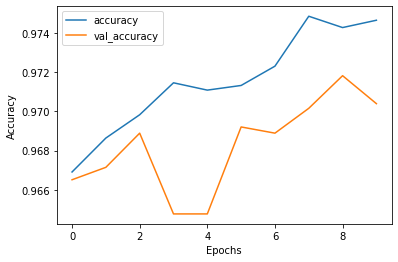

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

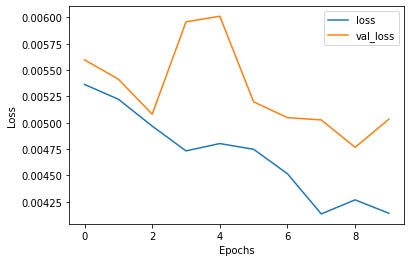

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

In [ ]:
# Get score
model.evaluate(X_val_, y_val_)

394/394 [==============================] - 1s 3ms/step - loss: 0.0050 - accuracy: 0.9704


[0.005034477915614843, 0.9703968167304993]

# Final

In [ ]:
predicts = model.predict(X_test)
result = [np.argmax(c) for c in predicts]

In [ ]:
pd.DataFrame({
    'ImageId' : list(range(1, len(result) + 1)),
    'Label' : result
}).to_csv('submission.csv', index = False)